# Análise Exploratória

<br/>

## Introdução  

Nesse notebook iremos realizar a análise exploratória dos dataset salvos na etapa anterior, e realizar inferências sobre os dados. Para tanto, nesse primeiro momento vamos plotar indicador por indicador para realizar comparações entre os países, para posteriormente montar um notebook mais limpo com as conclusões.

## Preparação

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

sns.set_style('white')

### Importando os Datasets

In [2]:
#Verificar o conteúdo da pasta com os arquivos csv tratados,
#para montar uma lista com todos os países contidos nele

for dirname, _, filenames in os.walk('../databases/processed/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../databases/processed/UY_tratado.csv
../databases/processed/CL_tratado.csv
../databases/processed/PY_tratado.csv
../databases/processed/AR_tratado.csv
../databases/processed/PE_tratado.csv
../databases/processed/SR_tratado.csv
../databases/processed/EC_tratado.csv
../databases/processed/BO_tratado.csv
../databases/processed/CO_tratado.csv
../databases/processed/VE_tratado.csv
../databases/processed/GF_tratado.csv
../databases/processed/BR_tratado.csv


In [3]:
lista_paises = ['AR', 'BO', 'BR', 'CL', 
                'CO', 'EC', 'GF', 'PE', 
                'PY', 'SR', 'UY', 'VE']

#Para cada item da lista, vamos criar um dataframe

for pais in lista_paises:
    exec(f'{pais} = pd.read_csv("../databases/processed/{pais}_tratado.csv", index_col=False)')

### Dicionario de dados

<br/>

id - 77821 
indicador - Economia - Investimentos em pesquisa e desenvolvimento 
unidade de medida - % do PIB 

id - 77823 
indicador - Economia - PIB per capita 
unidade de medida - US$ 

id - 77824 
indicador - Economia - População de 15 anos ou mais de idade economicamente ativa 
unidade de medida - % 

id - 77827 
indicador - Economia - Total do PIB 
unidade de medida - US$ 

id - 77831 
indicador - Indicadores sociais - Índice de desenvolvimento humano 

id - 77832 
indicador - Indicadores sociais - População com acesso à água potável 
unidade de medida - % 

id - 77833 
indicador - Indicadores sociais - População com acesso à rede sanitária 
unidade de medida - % 

id - 77849 
indicador - População - População total 
unidade de medida - habitantes 

id - 77850 
indicador - População - Taxa bruta de mortalidade 
unidade de medida - por mil 

id - 77851 
indicador - População - Taxa bruta de natalidade 
unidade de medida - por mil 

### Definindo Funções  

Como alguns gráficos que serão plotados serão identicos, serão definido funções para gerá-los, a fim de evitar escrever muito código.

In [4]:
#Verificar se a coluna existe num determinado data frame

def is_column_exist(indicador, df):
    return bool(indicador in df.columns)

In [5]:
#Plotar o gráfico de linha do matplotlib
#Pode ser usado para todos os indicadores, bastando 
#alterar a escala (principalmente a yticks)

def plot_line(df, indicador, xticks, yticks, color):
    if is_column_exist(indicador, df):
        plt.plot(df['year'], df[indicador], color=color)
        plt.xticks(xticks)
        plt.yticks(yticks)
        
    else:
        pass

In [6]:
#lista pre-definida de cores, caso opte a plotar todos os 12 países.

list_of_color = ['b', 'r', 'g', 'y', 
                 'c', 'k', 'tab:purple', 'tab:brown', 
                 'tab:orange', 'tab:gray', 'tab:olive', 'tab:cyan']

## Investimento em P&D

In [7]:
BR['cod_77821']

0     1.002
1     1.032
2     0.977
3     0.999
4     0.963
5     1.002
6     0.988
7     1.081
8     1.129
9     1.119
10    1.160
11    1.140
12    1.127
13    1.196
14    1.271
15    1.343
16    1.264
17    1.263
18      NaN
19      NaN
20      NaN
Name: cod_77821, dtype: float64

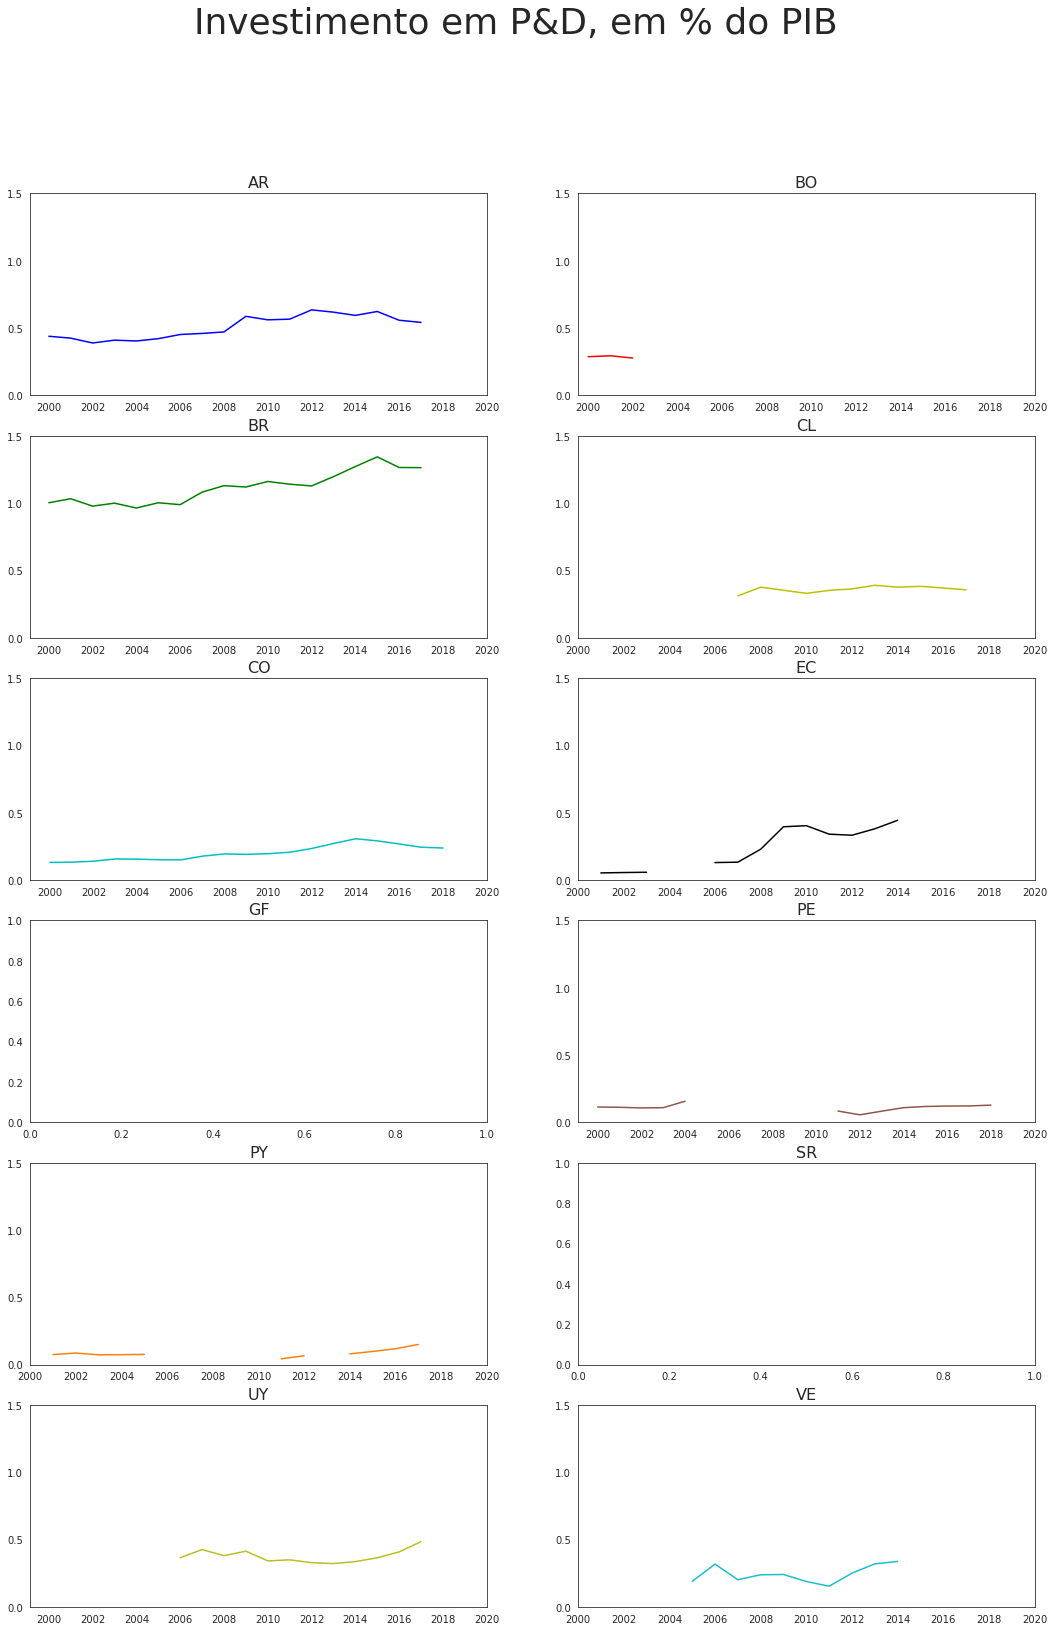

In [8]:
xticks = np.arange(2000, 2021, 2)
yticks = np.arange(0, 1.6, 0.5)

plt.figure(figsize=(18, 26))
plt.suptitle('Investimento em P&D, em % do PIB', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count+1)
    plt.title(f"{value}", fontsize=16)
    exec(f"plot_line({value}, 'cod_77821', xticks, yticks, color=list_of_color[{count}])")

Com exceção de Argentina, Brasil e Colômbia, todos os países aprentam várias quebras, indicando a existencia de valores nulos, ou seja, a informação não foi extraida.  
Uma pena, pois dessa forma inviabiliza a análise para quase todos os países.

## PIB per Capta

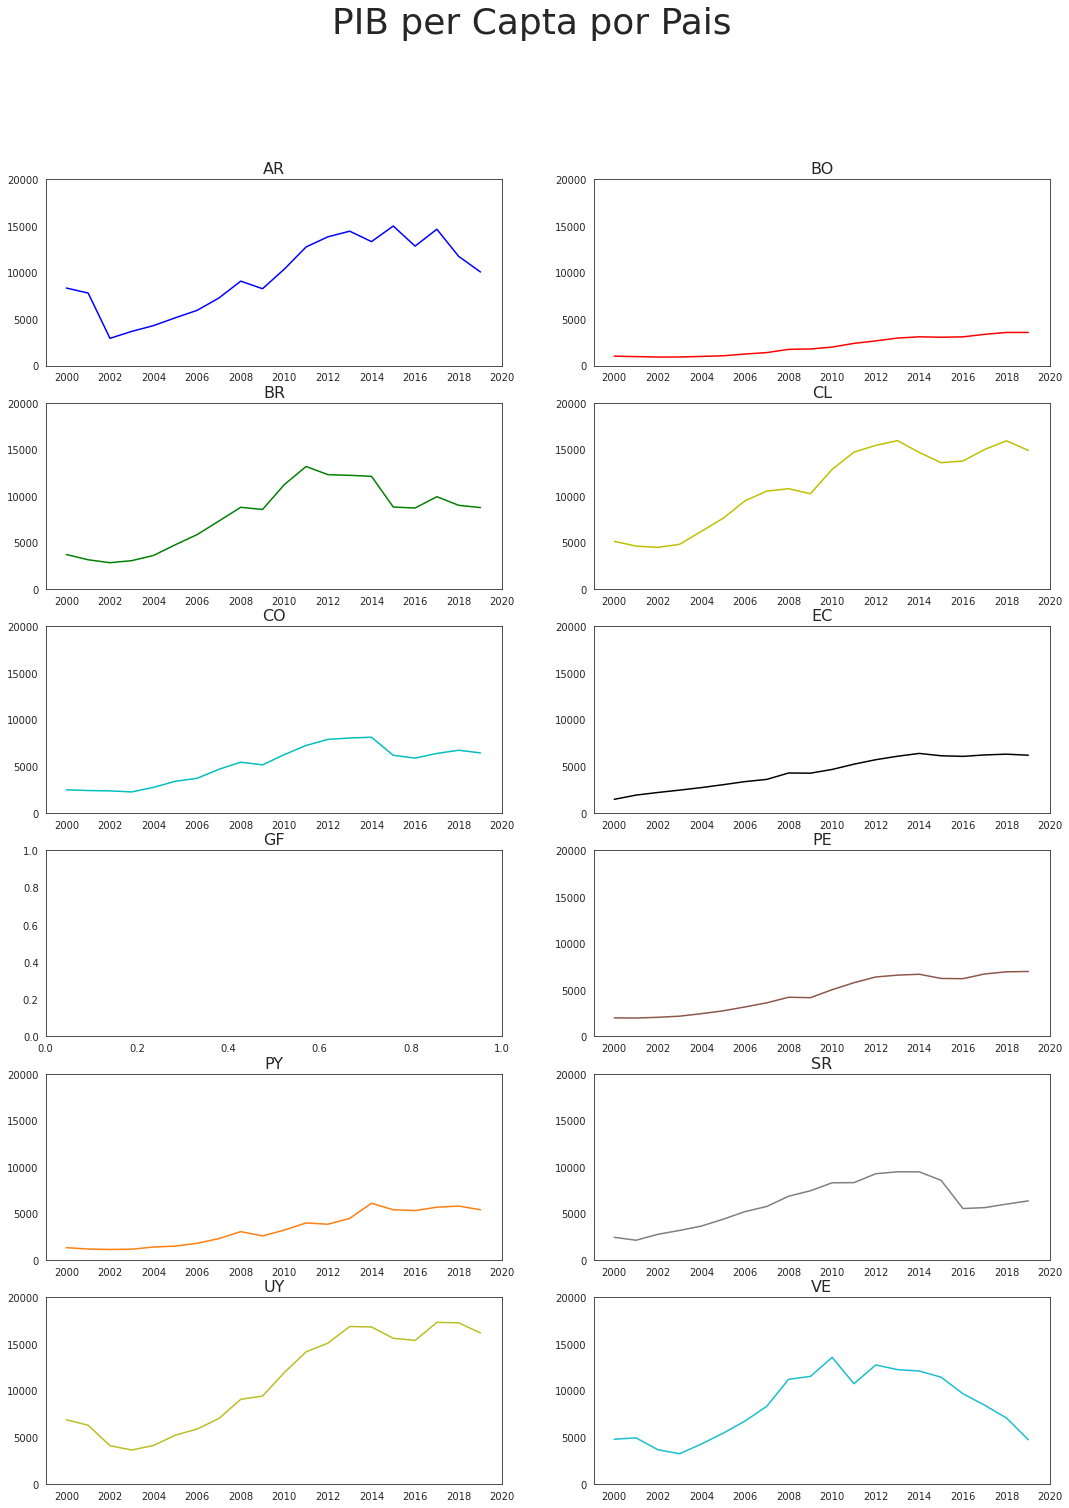

In [9]:
yticks = (np.arange(0, 20001, 5000))

plt.figure(figsize=(18, 24))

for count, value in enumerate(lista_paises):
    plt.suptitle('PIB per Capta por Pais', fontsize=36)
    plt.subplot(6, 2, count+1)
    plt.title(f"{value}", fontsize=16)
    exec(f"plot_line({value}, 'cod_77823', xticks, yticks, color=list_of_color[{count}])")

Aqui destaque positivo são o Chile e o Uruguai que possuem os melhores índices da América Latina, mesmo com as quedas que quase todos os países sofreram nos últimos 2 anos. Situação preocupante da Venezuela, onde vemos uma queda acentuada nos últimos 8 anos.

##  Pop maior que 15 anos econômicamente ativa %

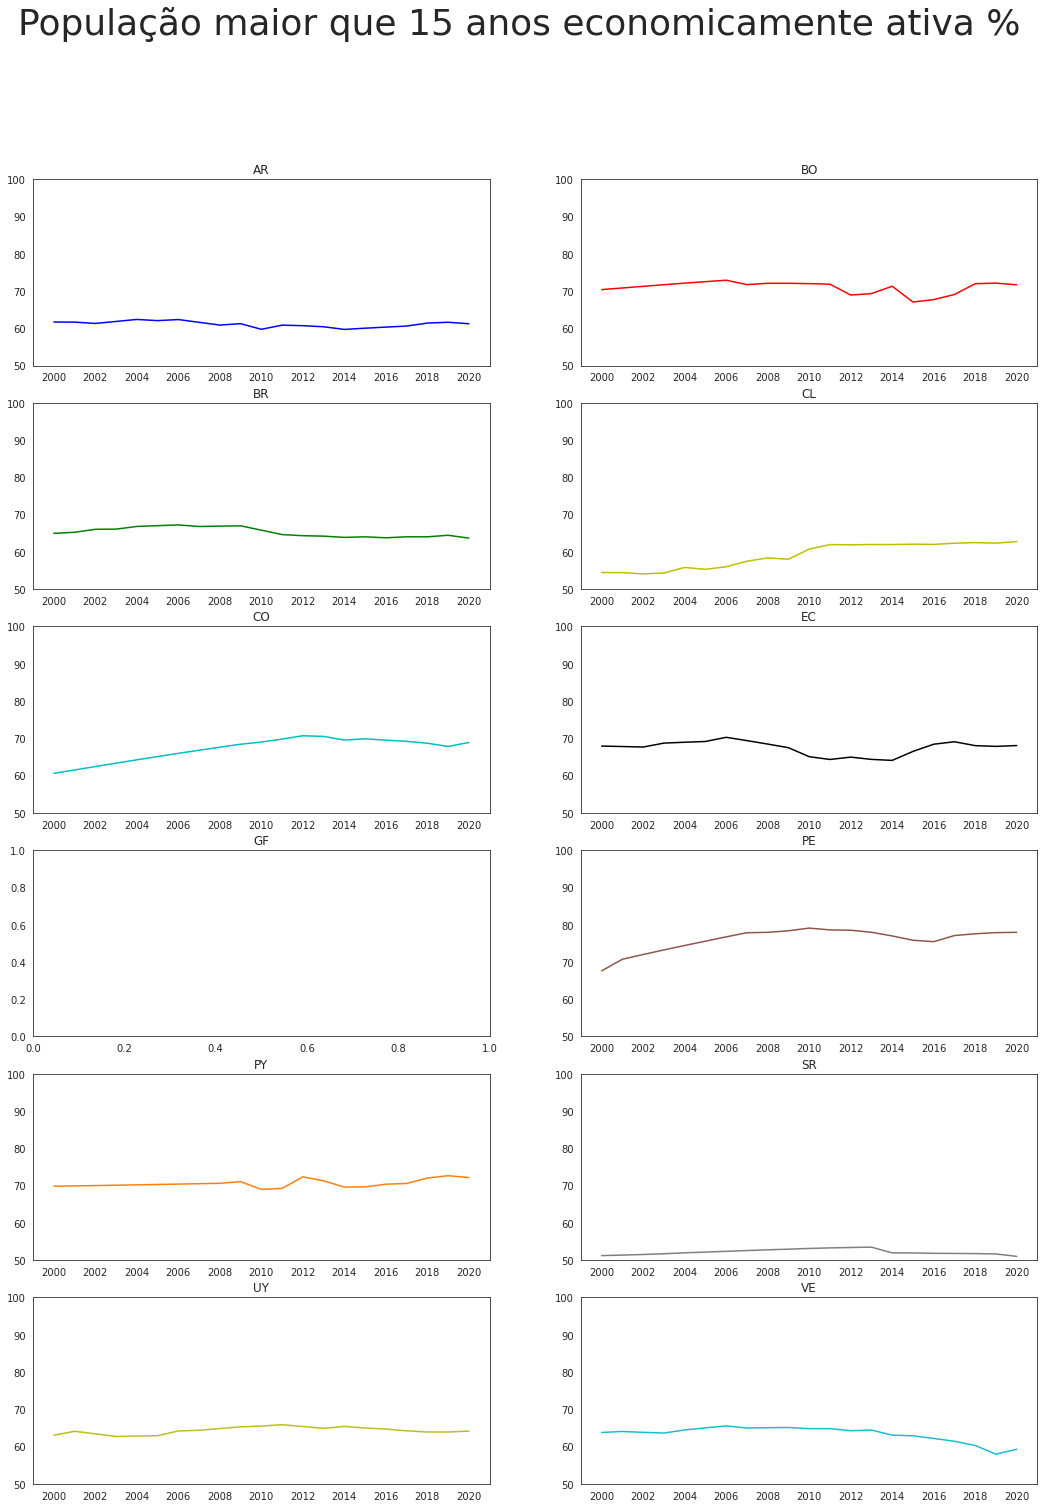

In [10]:
#77824

yticks = np.arange(50, 101, 10)

plt.figure(figsize=(18, 24))
plt.suptitle('População maior que 15 anos economicamente ativa %', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77824', xticks, yticks, color=list_of_color[count])")
    

O PEA é um índice muito importante para compreendermos o potencial econômico do país, pois representa a força de trabalho e portanto a capacidade produtiva de uma determinada sociedade.
A maioria dos países mantém o índce entre 60 e 70 %, mas temos países fora da curva, como o Peru (\~78%) e o Suriname (~51%)

## PIB Total

Para facilitar a leitura e caber melhor no gráfico, vamos dividir todo o resultado por mil.

In [11]:
def divide_by_thousand(indicador, df):
    if is_column_exist(indicador, df):
        df[indicador] = df[indicador] / 1000
        print(df[indicador])
        
    else:
        print('nao existe esse indicador')

In [12]:
for pais in lista_paises:
    print(pais)
    exec(f"divide_by_thousand('cod_77827', {pais})")
    print('')

AR
0     308.148
1     291.335
2     110.584
3     140.444
4     165.948
5     200.622
6     234.391
7     289.755
8     365.644
9     336.359
10    426.487
11    530.158
12    581.431
13    613.316
14    567.050
15    644.903
16    557.532
17    642.696
18    519.872
19    449.664
20        NaN
Name: cod_77827, dtype: float64

BO
0      8.398
1      8.142
2      7.905
3      8.082
4      8.773
5      9.549
6     11.452
7     13.120
8     16.674
9     17.340
10    19.650
11    23.963
12    27.084
13    30.659
14    32.996
15    33.000
16    33.941
17    37.509
18    40.288
19    40.895
20       NaN
Name: cod_77827, dtype: float64

BR
0      652.360
1      560.747
2      512.030
3      558.922
4      669.289
5      891.634
6     1107.627
7     1397.114
8     1695.855
9     1666.996
10    2208.838
11    2616.157
12    2465.228
13    2472.819
14    2456.044
15    1802.212
16    1795.693
17    2062.838
18    1885.469
19    1847.796
20         NaN
Name: cod_77827, dtype: float64

CL
0      

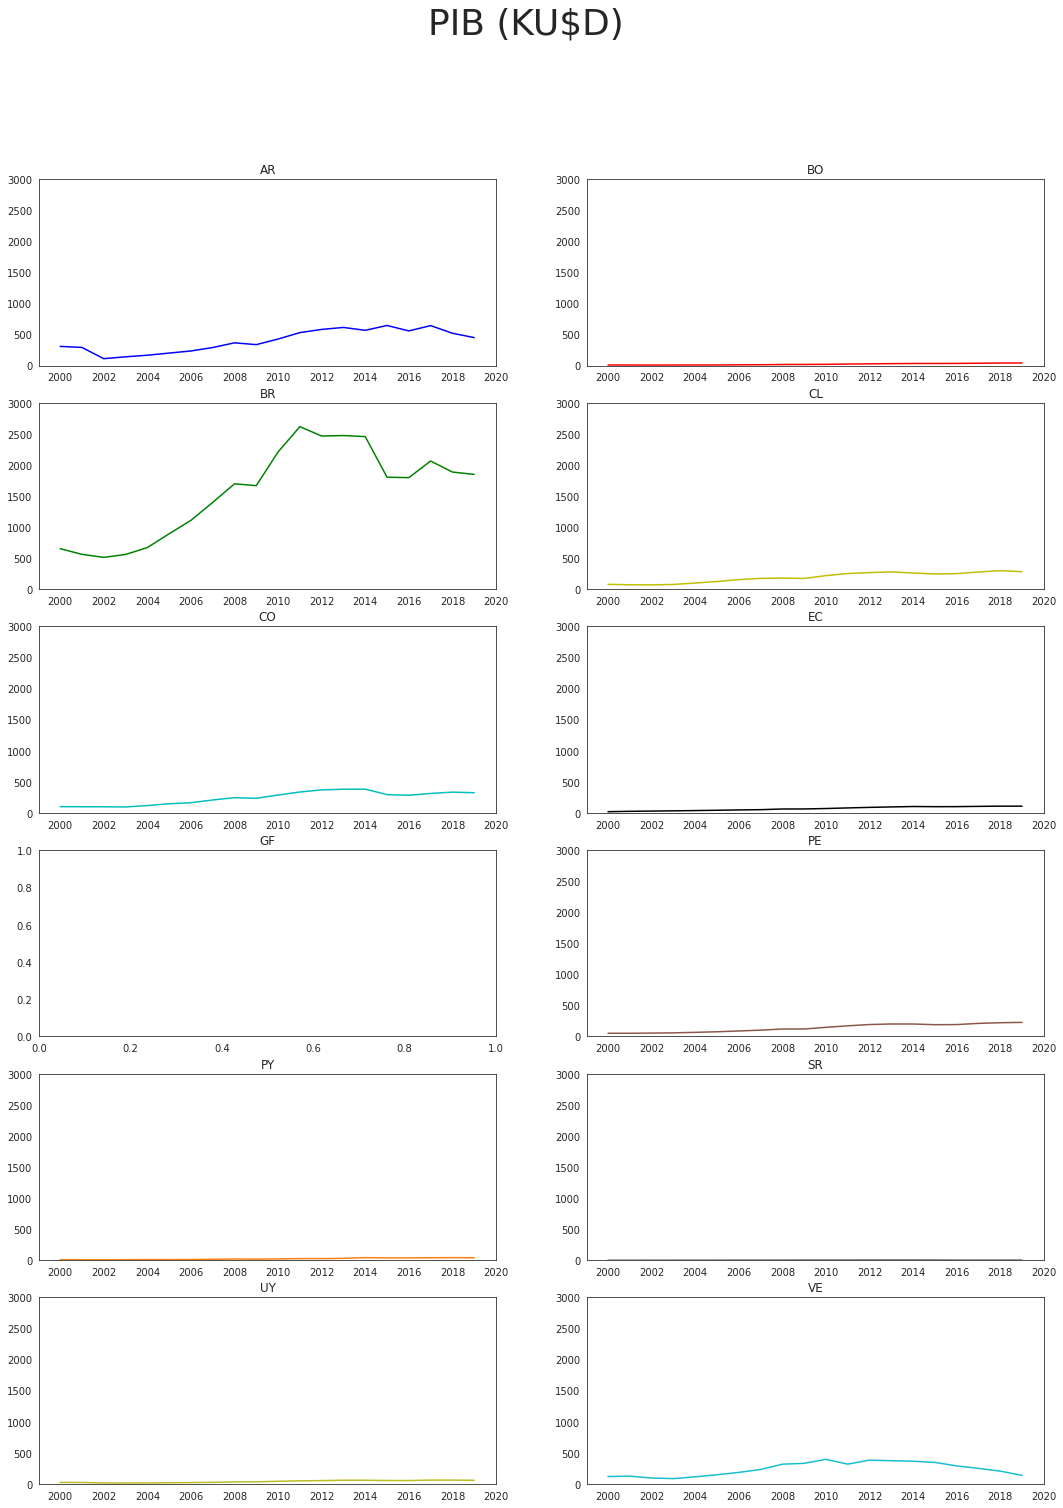

In [13]:
yticks = np.arange(0, 3001, 500)

plt.figure(figsize=(18, 24))
plt.suptitle('PIB (KU$D)', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77827', xticks, yticks, color=list_of_color[{count}])")
   

Como estamos plotando todos os países com a mesma escala, e o Brasil possui valores muito superiores não é fácil realizar a análise dos demais países.   
Por isso vamos excluir ele no plot abaixo.

In [14]:
pais_remove = 'BR'

nova_lista_paises = list(pais for pais in lista_paises if pais not in pais_remove)
nova_lista_paises

['AR', 'BO', 'CL', 'CO', 'EC', 'GF', 'PE', 'PY', 'SR', 'UY', 'VE']

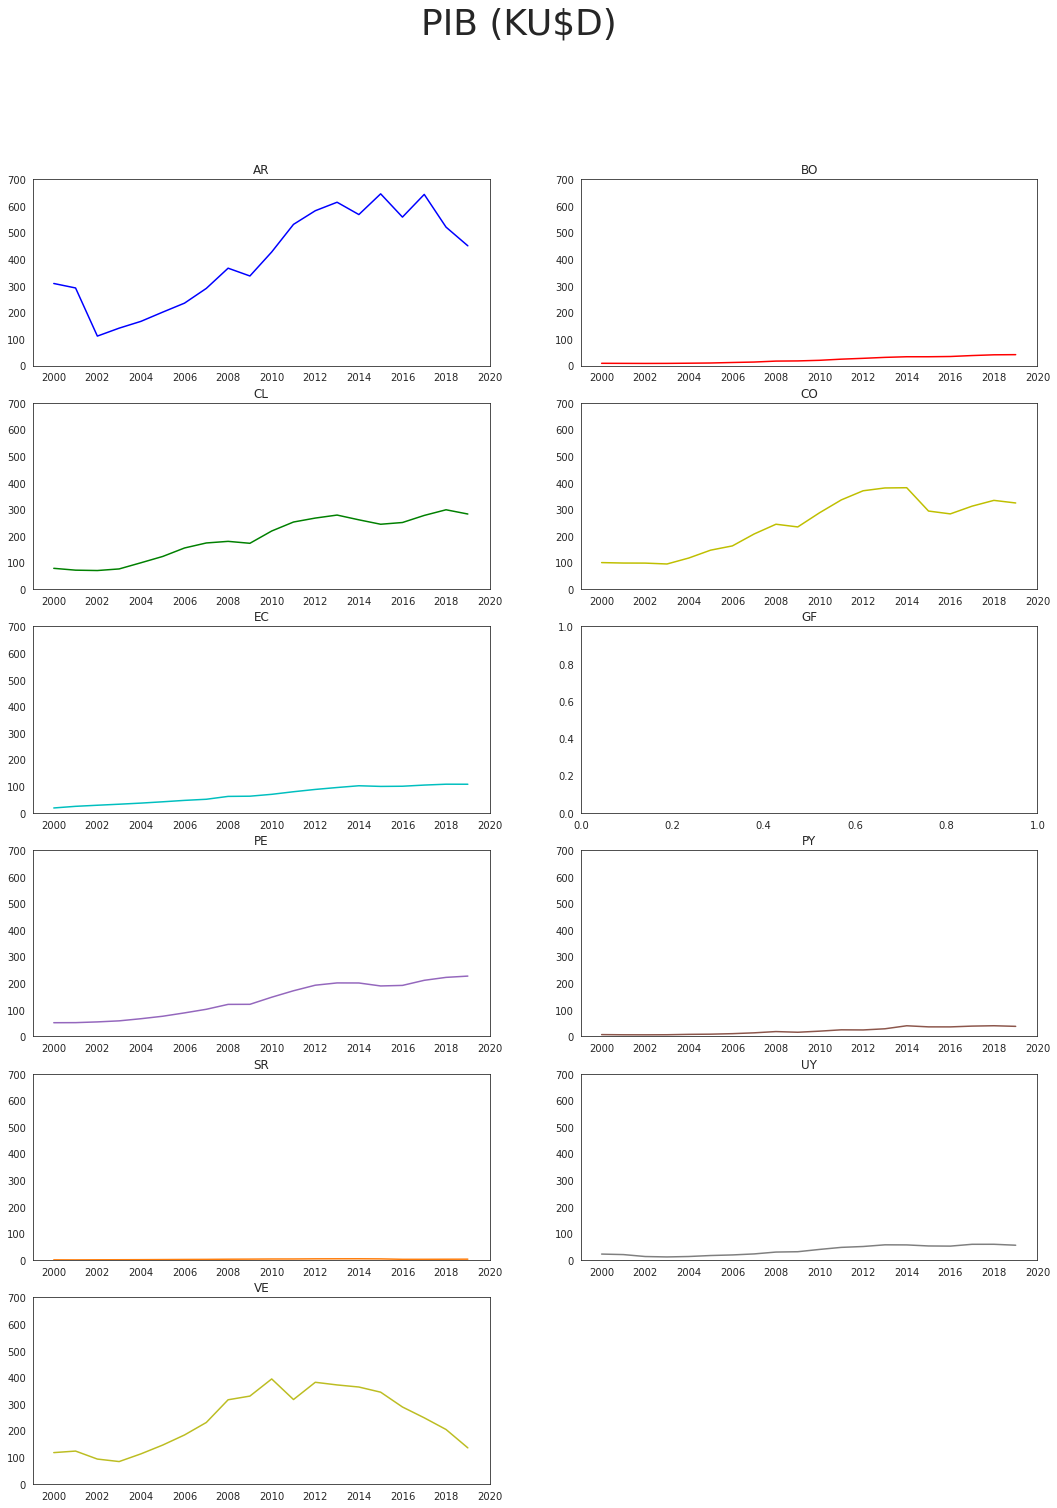

In [29]:
yticks = np.arange(0, 701, 100)

plt.figure(figsize=(18, 24))
plt.suptitle('PIB (KU$D)', fontsize=36)

for count, value in enumerate(nova_lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77827', xticks, yticks, color=list_of_color[{count}])")
   

## IDH

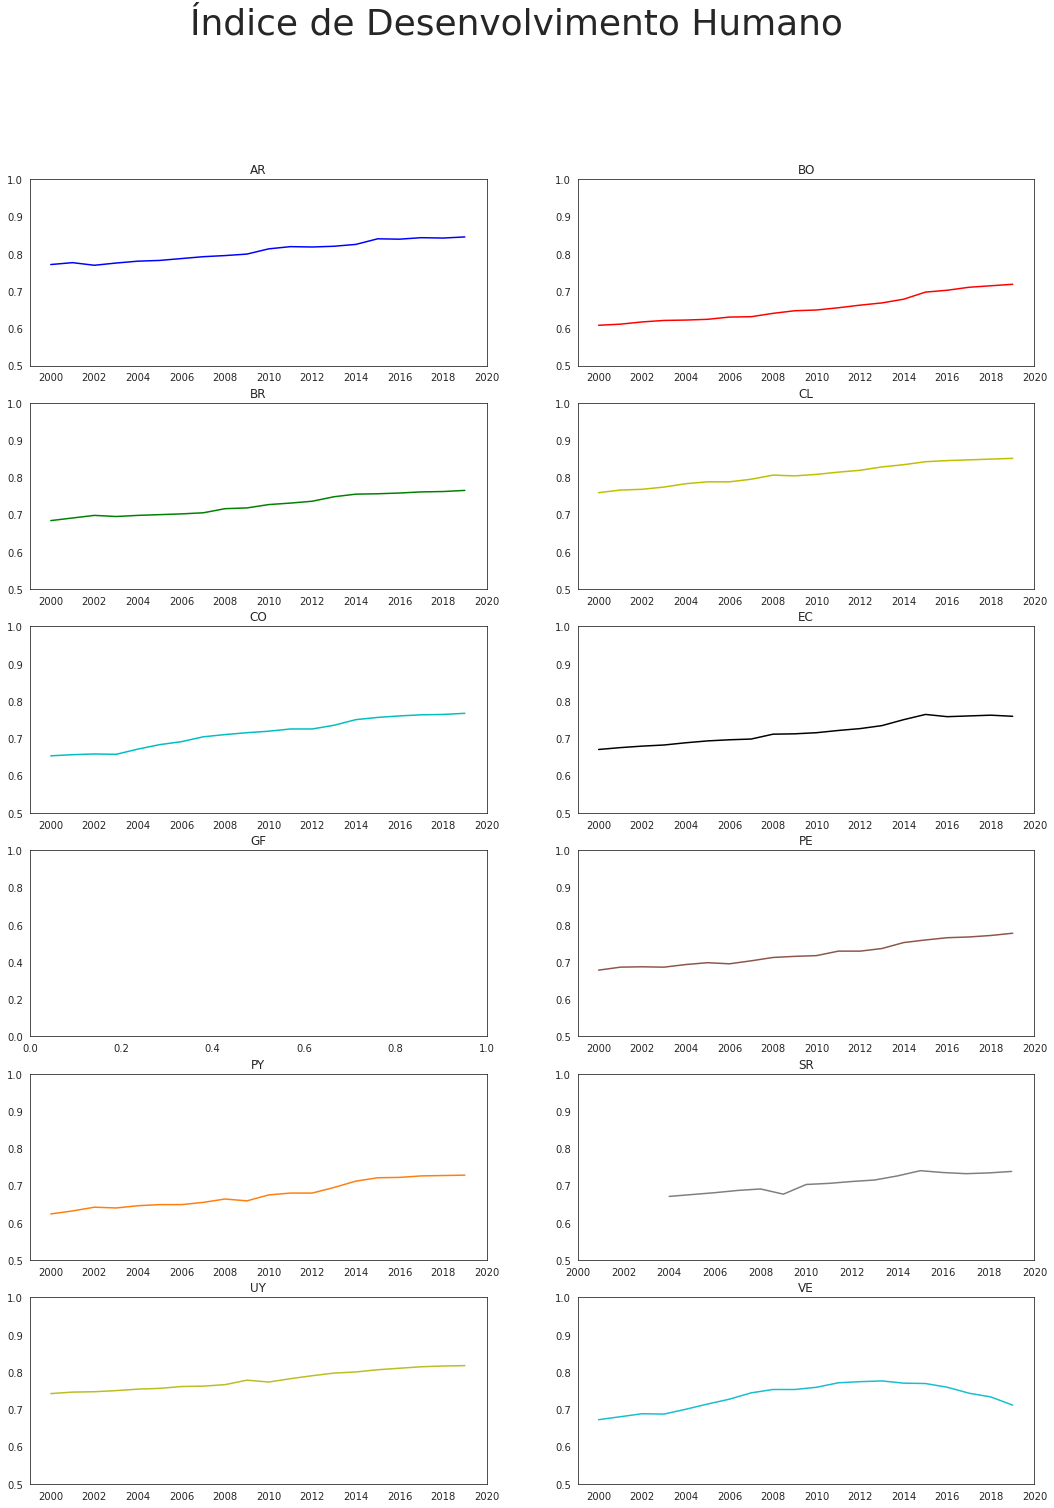

In [16]:
#77831
yticks = np.arange(0.5, 1.01, 0.10)

plt.figure(figsize=(18, 24))
plt.suptitle('Índice de Desenvolvimento Humano', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77831', xticks, yticks, color=list_of_color[{count}])")

E aqui vemos uma coisa interessante - o Brasil, mesmo sendo mais ricos que os países vizinhos possui desenvolvimento abaixo de Argentina, Chile, Uruguai, e a Vezenuela parece ter entrado em retrocesso a partir de meados de 2012 - podemos abordar melhor esse aspecto no relatório final.

## Acesso à Água %

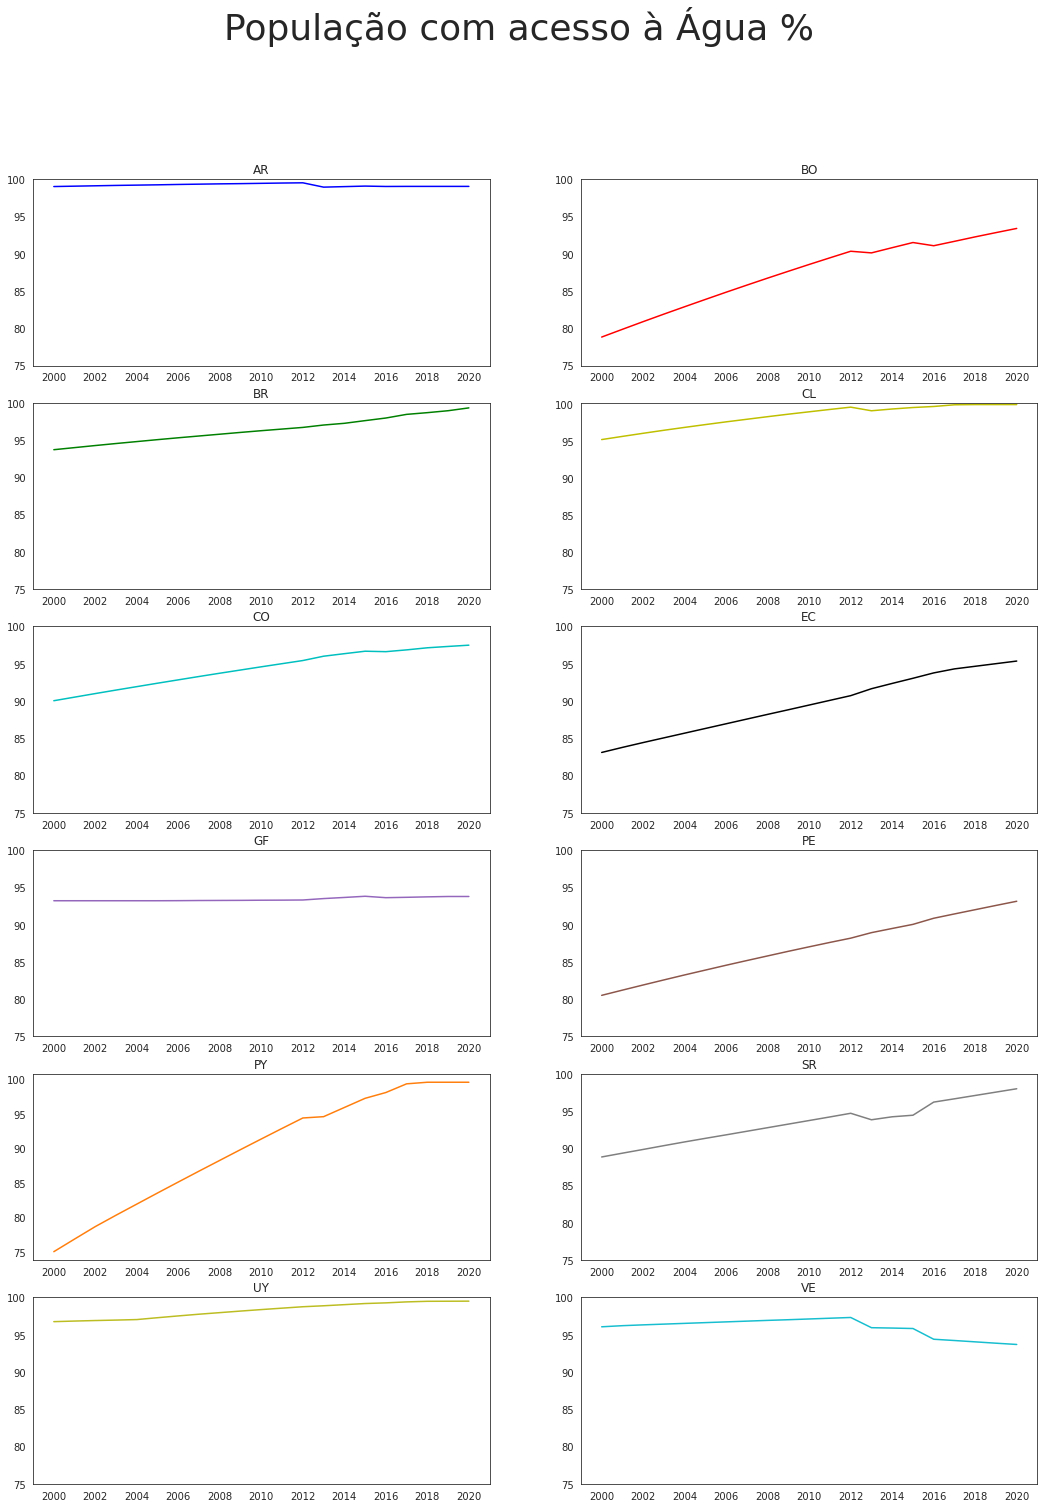

In [18]:
#77832
yticks = np.arange(75, 101, 5)

plt.figure(figsize=(18, 24))
plt.suptitle('População com acesso à Água %', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77832', xticks, yticks, color=list_of_color[{count}])")


Felizmente nesse quesito os países da América do sul não decepciona e a taxa de população com acesso à agua tem aumentado, com exceção à Venezuela.

## Acesso à Rede Sanitária %

In [19]:
CL['cod_77833'].max()

100.0

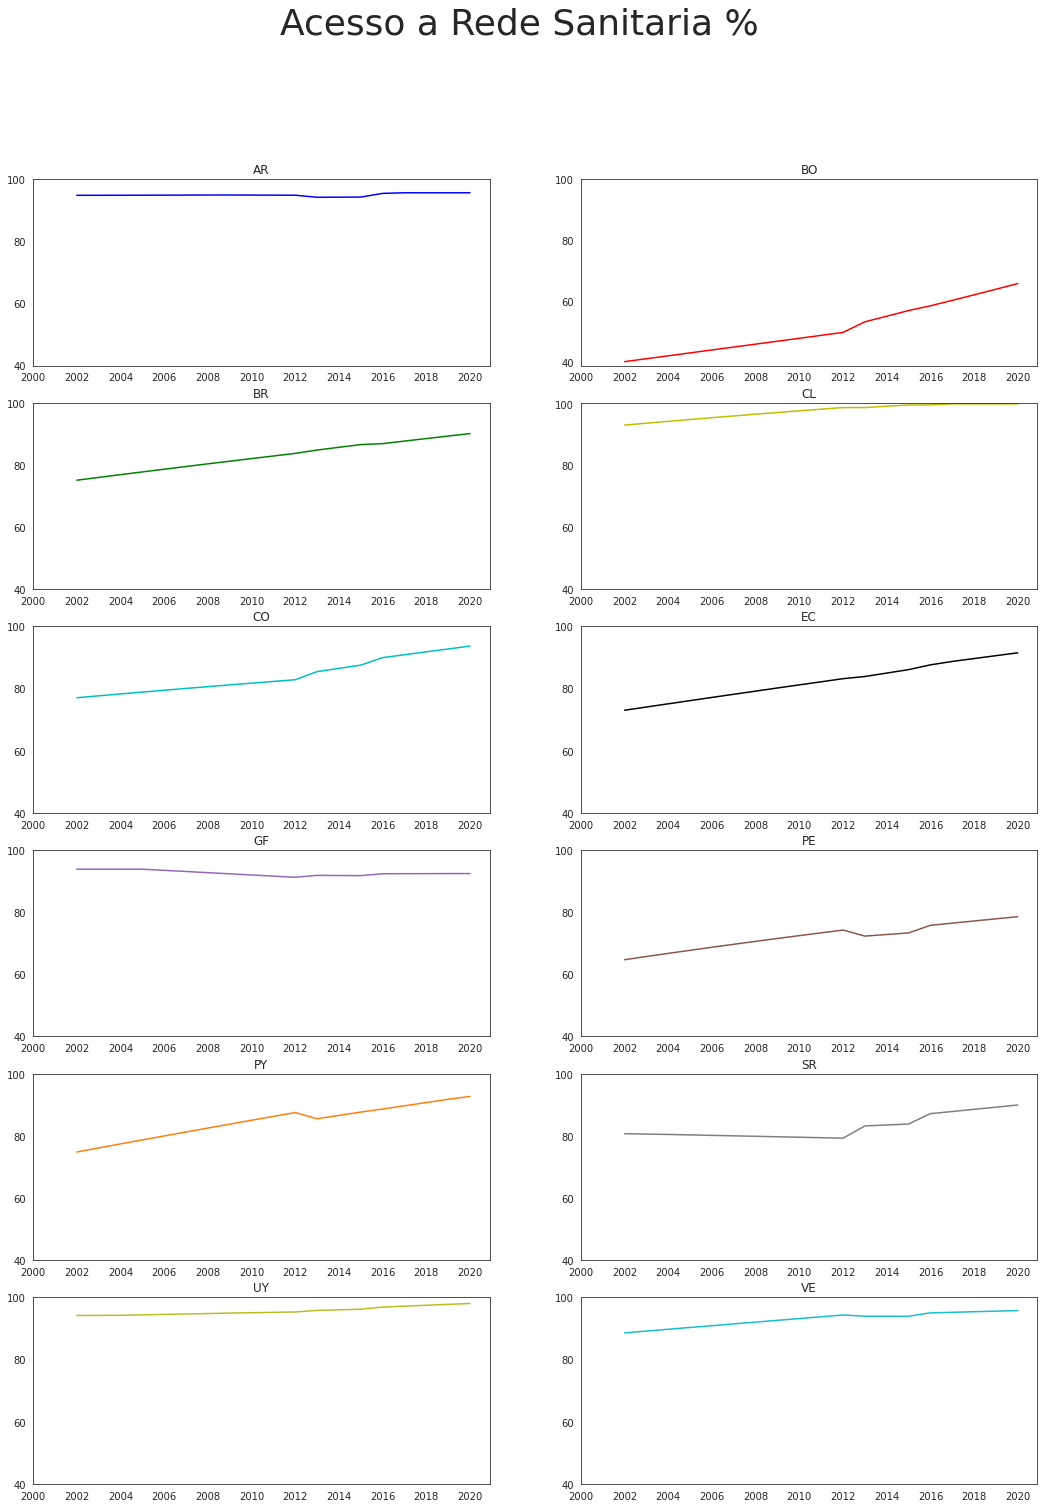

In [20]:
#77833
yticks = np.arange(40, 101, 20)

plt.figure(figsize=(18, 24))
plt.suptitle('Acesso a Rede Sanitaria %', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77833', xticks, yticks, color=list_of_color[{count}])")


Neste precisamos melhorar, com exceção do Chile, que já alcançou os 100%, temos uma grande parcela da população que ainda não tem acesso à rede sanitária. Bolívia saltou dos ~40% para 65% em 18 anos e representa a maior variação entre os países.

## População Total

In [21]:
BR['cod_77849'].max()

212559409

Novamente, para tentar tornar a escala mais fácil de ler, vamos dividir o valor por mil.

In [22]:
for pais in lista_paises:
    print(pais)
    exec(f"divide_by_thousand('cod_77849', {pais})")
    print('')

AR
0     37057.452
1     37471.509
2     37889.370
3     38309.379
4     38728.696
5     39145.488
6     39558.890
7     39970.224
8     40382.389
9     40799.407
10    41223.889
11    41656.879
12    42096.739
13    42539.925
14    42981.515
15    43075.416
16    43508.459
17    43937.143
18    44361.150
19    44780.675
20    45195.777
Name: cod_77849, dtype: float64

BO
0      8339.512
1      8496.375
2      8653.345
3      8810.420
4      8967.741
5      9125.409
6      9283.334
7      9441.444
8      9599.855
9      9758.748
10     9918.242
11    10078.343
12    10239.004
13    10400.264
14    10562.159
15    10869.732
16    11031.822
17    11192.853
18    11353.140
19    11513.102
20    11673.029
Name: cod_77849, dtype: float64

BR
0     175287.587
1     177750.670
2     180151.021
3     182482.149
4     184738.458
5     186917.361
6     189012.412
7     191026.637
8     192979.029
9     194895.996
10    196796.269
11    198686.688
12    200560.983
13    202408.632
14    204213.13

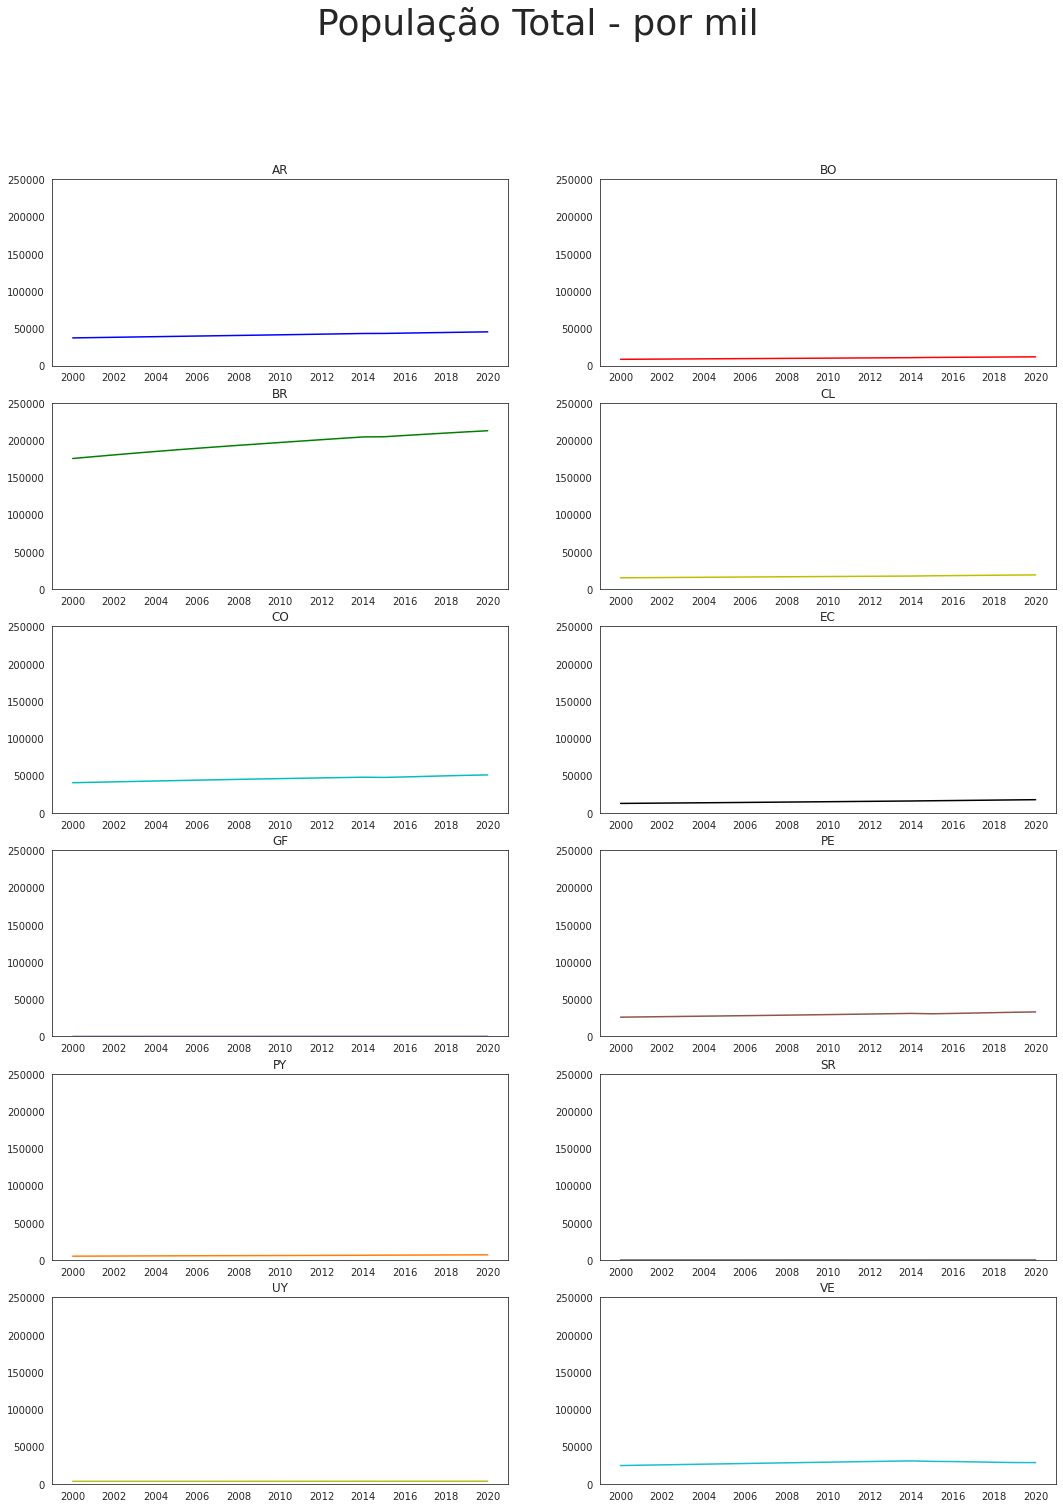

In [23]:
#77849
yticks = np.arange(0, 25e+4+ 1, 5e+4)

plt.figure(figsize=(18, 24))
plt.suptitle('População Total - por mil', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77849', xticks, yticks, color=list_of_color[{count}])")
    

A diferença do Brasil para os outros países é colossal, portanto vamos novamente retirar ele para tentar enxergar os gráficos dos outros países.

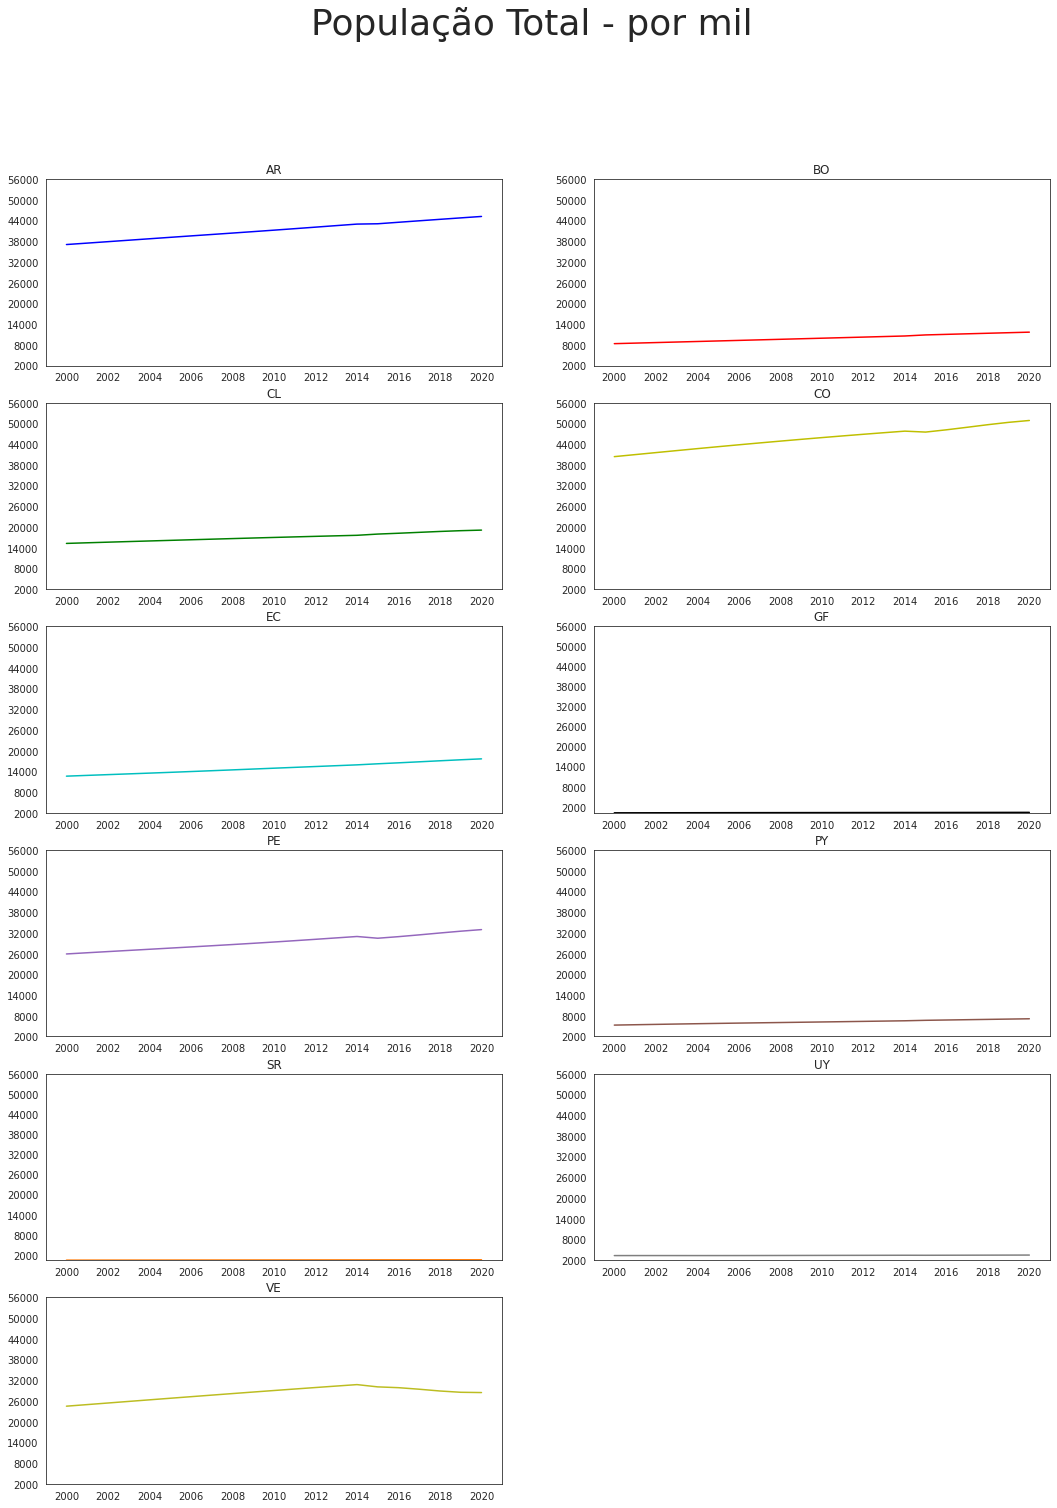

In [51]:
yticks = np.arange(2000, 60001, 6000)

plt.figure(figsize=(18, 24))
plt.suptitle('População Total - por mil', fontsize=36)

for count, value in enumerate(nova_lista_paises):
    plt.subplot(6, 2, count + 1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77849', xticks, yticks, color=list_of_color[{count}])")

## Taxa de Mortalidade - por mil

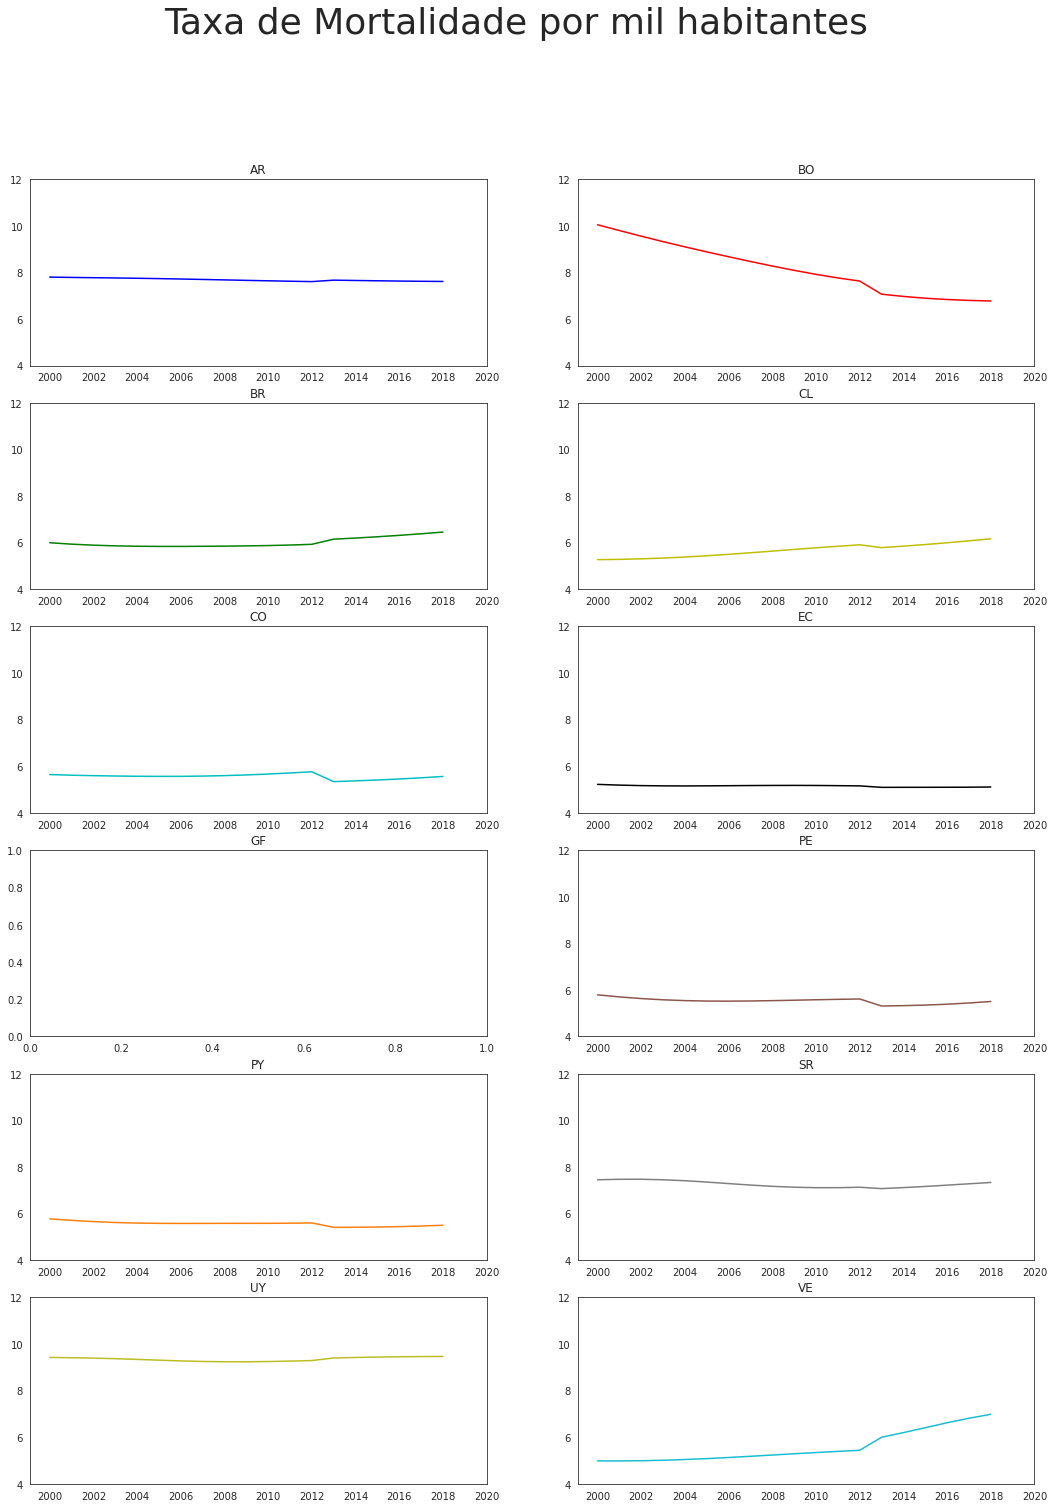

In [24]:
#77850
yticks = np.arange(4, 13, 2)

plt.figure(figsize=(18, 24))
plt.suptitle('Taxa de Mortalidade por mil habitantes', fontsize=36)


for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count+1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77850', xticks, yticks, color=list_of_color[{count}])")

Podemos ver uma queda acentuada na taxa da Bolívia desde os anos 2000, e uma subida preocupante na Venezuela, novamente após 2012.

## Taxa de Natalidade - por mil

In [25]:
BO['cod_77851'].max()

30.905

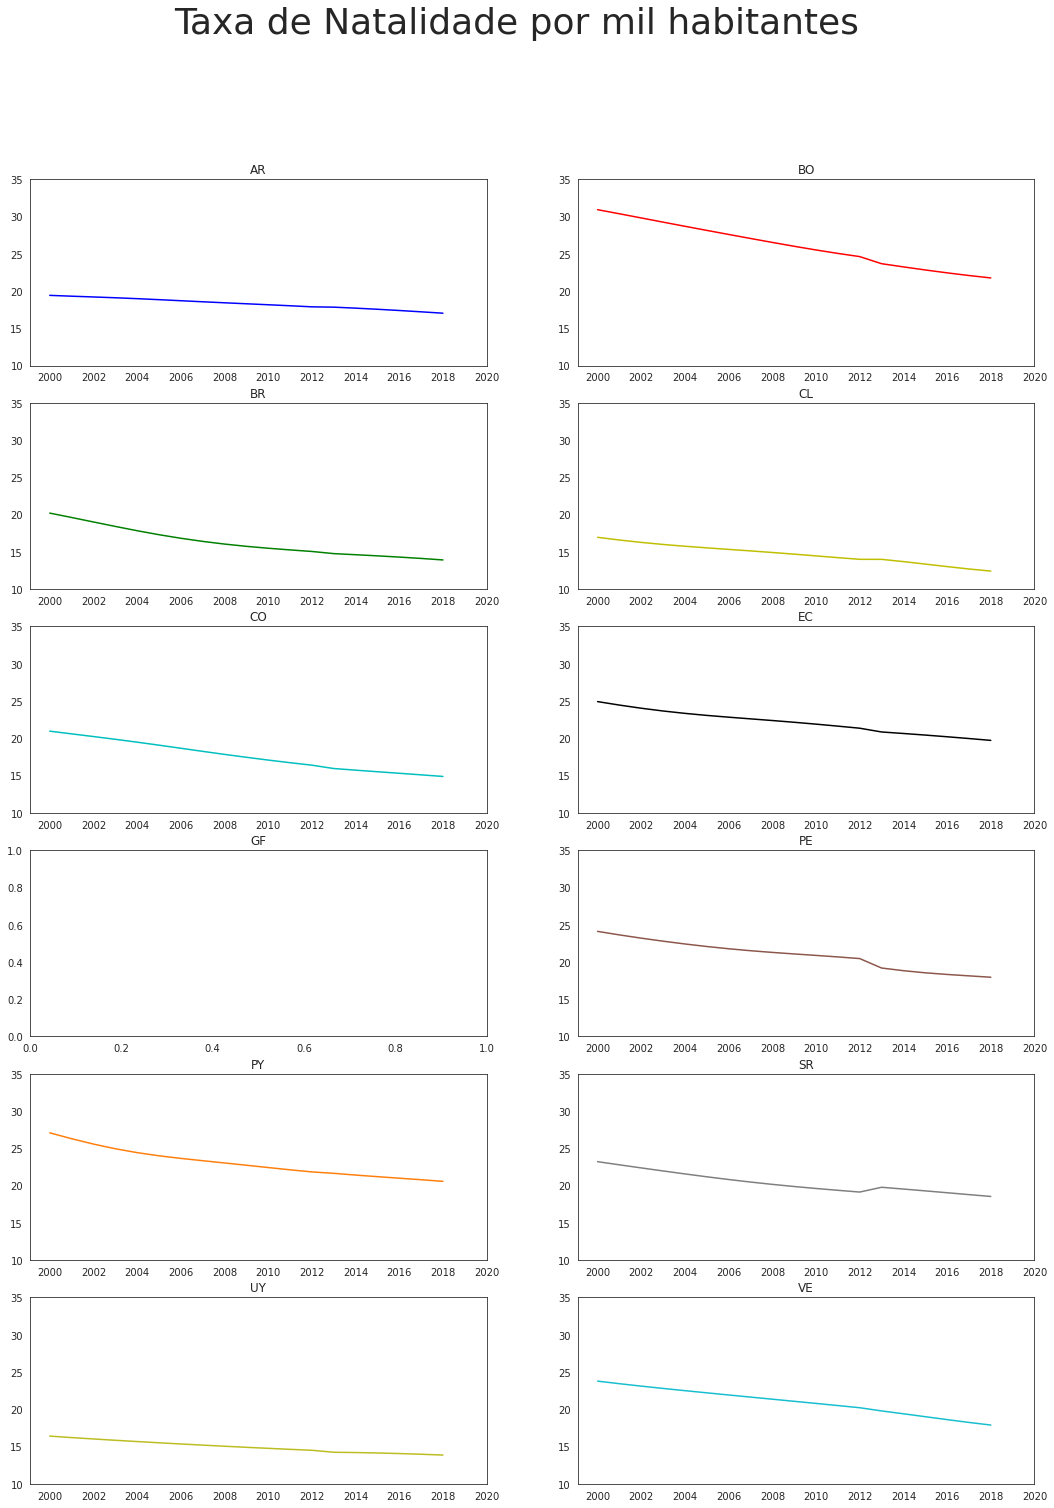

In [26]:
#77851
yticks = np.arange(10, 37, 5)

plt.figure(figsize=(18, 24))
plt.suptitle('Taxa de Natalidade por mil habitantes', fontsize=36)

for count, value in enumerate(lista_paises):
    plt.subplot(6, 2, count+1)
    plt.title(f'{value}')
    exec(f"plot_line({value}, 'cod_77851', xticks, yticks, color=list_of_color[{count}])")

A taxa de natalidade tem caído em todos os países, a princípio seguinda uma tendência mundial.